In [1]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras import layers
from keras import Sequential, Input
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [2]:
project_path = Path(os.getcwd()).parent.parent
datapath = (project_path /'data/processed/')

CLASSES = {0 : 'yes', 1 : 'no'}

In [21]:
def read_image(pathlist : list, size):
    data = []
    for path in pathlist:
        image=load_img(path, color_mode='grayscale', target_size=(size, int(size*0.8)))
        image=img_to_array(image)
        image=image/255.0
        data.append(image)
    return data

def get_sets(subfolder,CLASSES, size):
    folder_paths = []
    folder_labels = []
    labels = []
    for k,v in CLASSES.items():
        folder_paths += list((datapath / f"2_{v}/{subfolder}").rglob("*"))
    folder_labels = [0 if x.stem.split('_')[1] == 'yes' else 1 for x in folder_paths]

    img_list = read_image(folder_paths, size)

    return img_list, folder_labels

In [22]:
size = 224
X_train, y_train = get_sets('train', CLASSES, size)
X_val, y_val = get_sets('val', CLASSES, size)
X_test, y_test = get_sets('test', CLASSES, size)
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

125 125
42 42
42 42


In [5]:

print(np.unique(y_train), print(len(y_train)))

125
['no' 'yes'] None


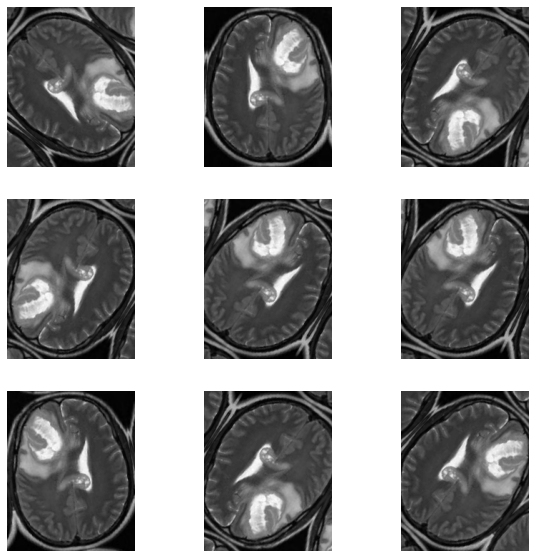

In [6]:
data_augmentation = Sequential([
  
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomContrast((0,1, 0,8))
])
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(X_train[0])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image, cmap='gray')
  plt.axis("off")

In [7]:
X_train[0].shape

(224, 179, 1)

In [44]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.regularizers import l2,l1_l2, l1
from keras import Input



model = keras.Sequential(
    [
        keras.Input(shape=(224,179,1)),
        Conv2D(128, kernel_size=(3, 3), activation="relu"),
        Conv2D(128, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1, activation="sigmoid"),
    ]
)

# metrics = [
#     keras.metrics.FalseNegatives(name="fn"),
#     keras.metrics.FalsePositives(name="fp"),
#     keras.metrics.TrueNegatives(name="tn"),
#     keras.metrics.TruePositives(name="tp"),
#     keras.metrics.Precision(name="precision"),
#     keras.metrics.Recall(name="recall"),
# ]

metrics = ['accuracy']

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0003)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics)

callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=16, restore_best_weights=True)
history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_val),np.array(y_val)), epochs=20, batch_size=5, verbose=2, callbacks=callbacks)

Epoch 1/20
25/25 - 45s - loss: 0.7270 - accuracy: 0.6080 - val_loss: 0.6822 - val_accuracy: 0.5714 - 45s/epoch - 2s/step
Epoch 2/20
25/25 - 47s - loss: 0.6681 - accuracy: 0.6160 - val_loss: 0.6837 - val_accuracy: 0.5714 - 47s/epoch - 2s/step
Epoch 3/20
25/25 - 49s - loss: 0.6424 - accuracy: 0.6400 - val_loss: 0.6765 - val_accuracy: 0.5714 - 49s/epoch - 2s/step
Epoch 4/20
25/25 - 49s - loss: 0.5207 - accuracy: 0.7840 - val_loss: 0.6357 - val_accuracy: 0.5952 - 49s/epoch - 2s/step
Epoch 5/20
25/25 - 49s - loss: 0.3982 - accuracy: 0.8560 - val_loss: 0.6157 - val_accuracy: 0.6190 - 49s/epoch - 2s/step
Epoch 6/20
25/25 - 48s - loss: 0.3828 - accuracy: 0.9200 - val_loss: 0.6222 - val_accuracy: 0.7381 - 48s/epoch - 2s/step
Epoch 7/20
25/25 - 48s - loss: 0.1937 - accuracy: 0.9440 - val_loss: 1.1870 - val_accuracy: 0.5714 - 48s/epoch - 2s/step
Epoch 8/20
25/25 - 47s - loss: 0.1197 - accuracy: 0.9840 - val_loss: 1.0218 - val_accuracy: 0.6667 - 47s/epoch - 2s/step
Epoch 9/20
25/25 - 44s - loss: 0

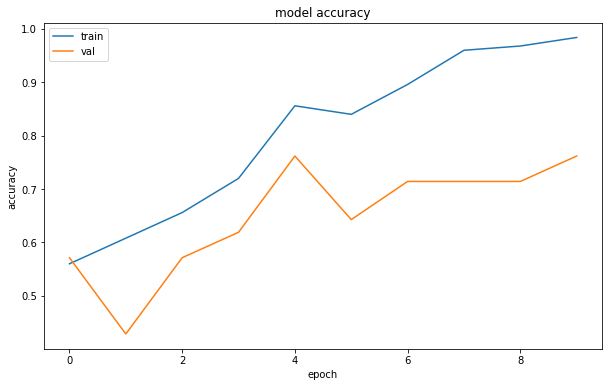

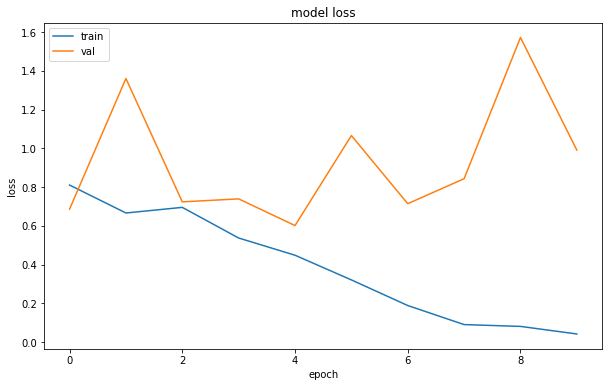

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
CLASS_NAMES = ['yes', 'no']


plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.figure(figsize = (10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')